In [1]:
import os
os.chdir("..")
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d:\SPO4Portfolio


# 累计收益曲线

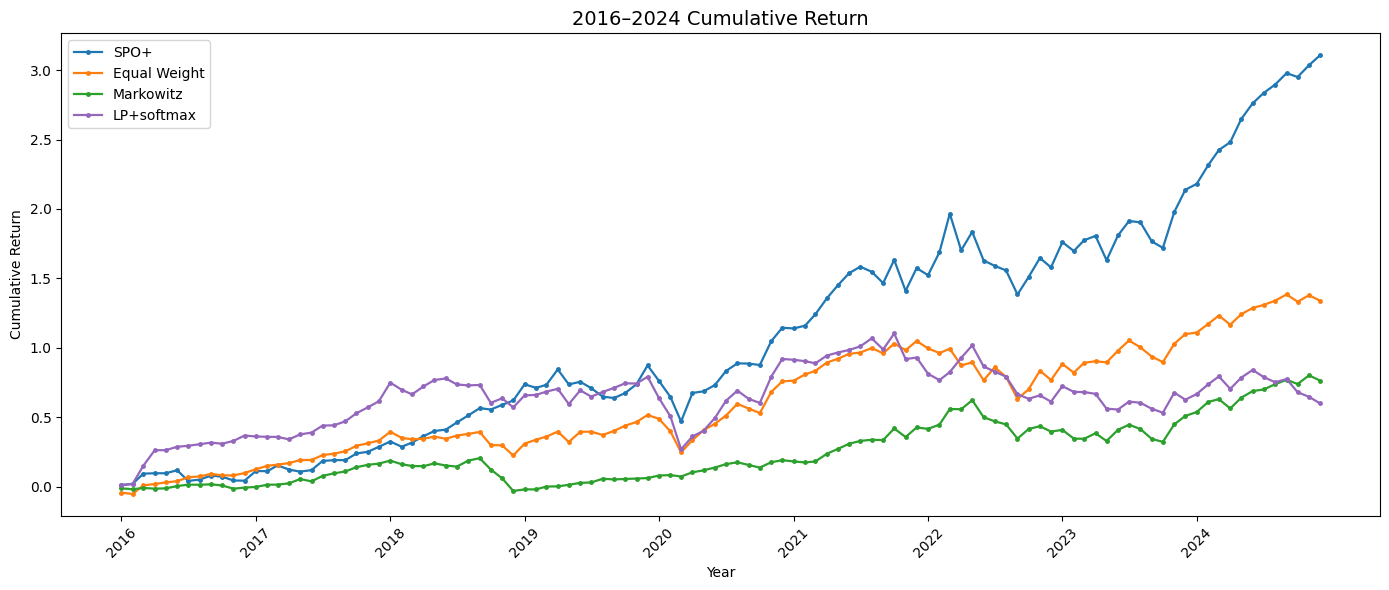

In [28]:
lp_spo = pd.read_csv("result/8_ticker_1ytrain1yinfer/LP+SPO_plus.csv")
ew = pd.read_csv("result/8_ticker_1ytrain1yinfer/EqualWeight.csv")
markowitz = pd.read_csv("result/8_ticker_1ytrain1yinfer/MaxSharpe.csv")
lp_softmax = pd.read_csv("result/8_ticker_1ytrain1yinfer/LP+softmax.csv")

# ======================
# 1. Month 转 datetime
# ======================
lp_spo["Month"] = pd.to_datetime(lp_spo["Month"])
ew["Month"] = pd.to_datetime(ew["Month"])
markowitz["Month"] = pd.to_datetime(markowitz["Month"])
lp_softmax["Month"] = pd.to_datetime(lp_softmax["Month"])

# ======================
# 2. 筛选 2016–2024
# ======================
start_date = pd.to_datetime("2016-01-01")

lp_spo = lp_spo[lp_spo["Month"] >= start_date].reset_index(drop=True)
ew = ew[ew["Month"] >= start_date].reset_index(drop=True)
markowitz = markowitz[markowitz["Month"] >= start_date].reset_index(drop=True)
lp_softmax = lp_softmax[lp_softmax["Month"] >= start_date].reset_index(drop=True)

# ======================
# 3. 重新计算累计收益（从 0 开始）
# ======================
lp_spo["Cum"] = (1 + lp_spo["MonthlyReturn"]).cumprod() - 1
ew["Cum"] = (1 + ew["MonthlyReturn"]).cumprod() - 1
markowitz["Cum"] = (1 + markowitz["MonthlyReturn"]).cumprod() - 1
lp_softmax["Cum"] = (1 + lp_softmax["MonthlyReturn"]).cumprod() - 1

# ======================
# 4. Fancy 折线图
# ======================
plt.figure(figsize=(14, 6))

months = lp_spo["Month"]

plt.plot(months, lp_spo["Cum"], label="SPO+", linewidth=1.6, marker=".", markersize=5, color="#1f77b4")
plt.plot(months, ew["Cum"], label="Equal Weight", linewidth=1.6, marker=".", markersize=5, color="#ff7f0e")
plt.plot(months, markowitz["Cum"], label="Markowitz", linewidth=1.6, marker=".", markersize=5, color="#2ca02c")
plt.plot(months, lp_softmax["Cum"], label="LP+softmax", linewidth=1.6, marker=".", markersize=5, color="#9467bd")

plt.title("2016–2024 Cumulative Return", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Cumulative Return")

# x 轴管理成按年份显示
years = sorted(list(set(months.dt.year)))
year_ticks = [pd.to_datetime(f"{y}-01-01") for y in years]
plt.xticks(year_ticks, [str(y) for y in years], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()